## Extract data from Mappilary and spatial join with Walking buffers

In [1]:
import mapillary.interface as mly
import requests
import json

#import packages
import pandas as pd
import geopandas as gpd
import fiona

In [3]:
MLY_ACCESS_TOKEN = 'MLY|5153936194708194|7c728d108af45f5a0a1036dbfd6839c9'

In [4]:
mly.set_access_token(MLY_ACCESS_TOKEN)

{'token': 'SUCCESS'}

In [4]:
with open('LimiteAmadora_v2.json') as f:
    data = json.load(f)


In [5]:
data?

Type:        dict
String form: {'displayFieldName': '', 'fieldAliases': {'OBJECTID_1': 'OBJECTID_1', 'OBJECTID': 'OBJECTID', 'Mu <...> 999995], [-95776.29970000032, -96214.87910000049], [-95764.33970000036, -96229.82870000042]]]}}]}
Length:      6
Docstring:  
dict() -> new empty dictionary
dict(mapping) -> new dictionary initialized from a mapping object's
    (key, value) pairs
dict(iterable) -> new dictionary initialized as if via:
    d = {}
    for k, v in iterable:
        d[k] = v
dict(**kwargs) -> new dictionary initialized with the name=value pairs
    in the keyword argument list.  For example:  dict(one=1, two=2)


In [5]:
data = json.loads(
      mly.map_feature_points_in_bbox(
          {
             "east": -9.226086820957557,
             "south": 38.75398981588303,
             "west": -9.249818708954983,
             "north": 38.7676429867215,
          },
          
          #filter_values=["object--street-light"],
      )
  )

with open("map_feature_points_in_bbox_Amadora1_21_11_22.json", mode="w") as f:
    json.dump(data, f, indent=4)
    
#limite area amadora
# Est 38.76007917811692, -9.226086820957557
#south 38.75398981588303, -9.237159524417079
#W 38.7579385159894, -9.249818708954983
#North 38.7676429867215, -9.234926597427867




Requesting GET to https://tiles.mapillary.com/maps/vtp/mly_map_feature_point/2/14/7771/6275/?access_token=MLY%7C5153936194708194%7C7c728d108af45f5a0a1036dbfd6839c9
Response 200 OK received in 1013ms
Requesting GET to https://tiles.mapillary.com/maps/vtp/mly_map_feature_point/2/14/7771/6276/?access_token=MLY%7C5153936194708194%7C7c728d108af45f5a0a1036dbfd6839c9
Response 200 OK received in 817ms
Requesting GET to https://tiles.mapillary.com/maps/vtp/mly_map_feature_point/2/14/7772/6275/?access_token=MLY%7C5153936194708194%7C7c728d108af45f5a0a1036dbfd6839c9
Response 200 OK received in 400ms
Requesting GET to https://tiles.mapillary.com/maps/vtp/mly_map_feature_point/2/14/7772/6276/?access_token=MLY%7C5153936194708194%7C7c728d108af45f5a0a1036dbfd6839c9
Response 200 OK received in 1181ms


In [6]:
data = json.loads(
      mly.map_feature_points_in_bbox(
          {
             "east": -9.195849232869104,
             "south": 38.71719773435354,
             "west": -9.270322793273385,
             "north": 38.80750035479019,
          },
          
          #filter_values=["object--street-light"],
      )
  )

with open("map_feature_points_in_bbox_AmadoraMN_21_10_11.json", mode="w") as f:
    json.dump(data, f, indent=4)
    
#limite concelho amadora
# Est 38.76062038357874, -9.195849232869104
#south 38.71719773435354, -9.211347284390358
#W 38.75903500218953, -9.270322793273385
#North 38.80750035479019, -9.238981158725837


Requesting GET to https://tiles.mapillary.com/maps/vtp/mly_map_feature_point/2/14/7770/6272/?access_token=MLY%7C5153936194708194%7C7c728d108af45f5a0a1036dbfd6839c9
Response 200 OK received in 1028ms
Requesting GET to https://tiles.mapillary.com/maps/vtp/mly_map_feature_point/2/14/7770/6273/?access_token=MLY%7C5153936194708194%7C7c728d108af45f5a0a1036dbfd6839c9
Response 200 OK received in 236ms
Requesting GET to https://tiles.mapillary.com/maps/vtp/mly_map_feature_point/2/14/7770/6274/?access_token=MLY%7C5153936194708194%7C7c728d108af45f5a0a1036dbfd6839c9
Response 200 OK received in 220ms
Requesting GET to https://tiles.mapillary.com/maps/vtp/mly_map_feature_point/2/14/7770/6275/?access_token=MLY%7C5153936194708194%7C7c728d108af45f5a0a1036dbfd6839c9
Response 200 OK received in 273ms
Requesting GET to https://tiles.mapillary.com/maps/vtp/mly_map_feature_point/2/14/7770/6276/?access_token=MLY%7C5153936194708194%7C7c728d108af45f5a0a1036dbfd6839c9
Response 200 OK received in 452ms
Requestin

## Spatial join with the walking buffers

In [2]:
#import the gdb with the database
buffers = gpd.read_file("D:/GoogleDrive/_Research/2018_08_SmailleMentalHealth/SIG/Smaile.gdb", layer = 'WalkingBuffer_OSM_vf_Amadora')
buffers.head()



,FacilityID,Name,FromBreak,ToBreak,OBJECTID_1,Localizacao_erros__OBJECTID,Localizacao_erros__Smaile_Inq,Localizacao_erros__Smaile_I_1,Localizacao_erros__Smaile_I_2,Localizacao_erros__Smaile_I_3,...,CP7_ETRS89_CP7_text,FCA_area,code,code_string,Shape_Length,Shape_Area,Min_Slope,Max_Slope,Avg_Slope,geometry
0,705,920 : 0 - 500,0.0,500.0,705,719.0,920.0,Rua Beatriz Costa,1.0,2.0,...,2610-195,390318.032524,920.0,920,3096.938495,390318.032524,0.099928,52.081560,8.786277,"MULTIPOLYGON (((-95313.120 -102242.778, -95163..."
1,704,1161 : 0 - 500,0.0,500.0,704,708.0,1161.0,Rua das Milflores,1.0,2.0,...,2610-194,515007.297532,1161.0,1161,3445.755143,515007.297532,0.099967,52.081560,9.500126,"MULTIPOLYGON (((-94713.116 -102442.783, -94588..."
2,702,452 : 0 - 500,0.0,500.0,702,467.0,452.0,Avenida dos Moinhos,1.0,2.0,...,2610-120,525320.043783,452.0,452,2921.595459,525320.043783,0.099993,52.081560,10.117352,"MULTIPOLYGON (((-94613.116 -103017.788, -94688..."
3,724,533 : 0 - 500,0.0,500.0,724,1501.0,533.0,Praceta Ireneu Dias,1.0,11.0,...,2720-720,230002.850011,533.0,533,1896.686500,230002.850011,0.569686,47.451116,13.843252,"MULTIPOLYGON (((-95888.124 -102467.777, -96063..."
4,755,1137 : 0 - 500,0.0,500.0,755,1543.0,1137.0,Rua Eus├®bio da Silva Ferreira,1.0,11.0,...,2720-803,353442.008768,1137.0,1137,2511.298767,353442.008768,0.480205,46.284451,13.768215,"MULTIPOLYGON (((-96438.125 -101717.769, -96363..."


<AxesSubplot:>

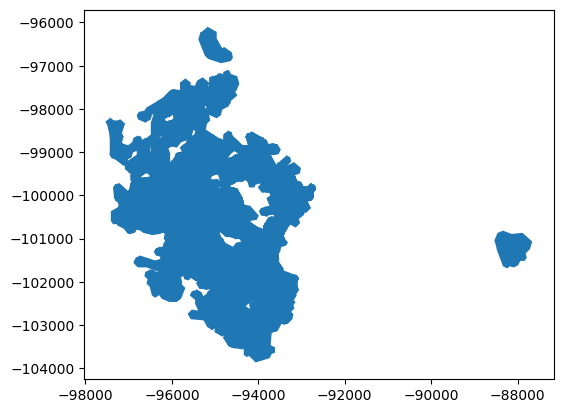

In [3]:
buffers.plot()

In [4]:
mappilaryPts = gpd.read_file("map_feature_points_in_bbox_AmadoraMN_21_10_11.json")

In [5]:
mappilaryPts.head()

,first_seen_at,id,last_seen_at,value,geometry
0,1625154367703,406852510640165,1625154367703,object--street-light,POINT (-9.25188 38.80595)
1,1625239080564,162802302453725,1625239080564,marking--discrete--crosswalk-zebra,POINT (-9.25337 38.80554)
2,1625239062499,183298753761221,1625239062499,object--traffic-sign--back,POINT (-9.25354 38.80631)
3,1625154369739,406852557306827,1625154369739,object--street-light,POINT (-9.25203 38.80577)
4,1625069301823,224615446189281,1625239053413,object--traffic-sign--front,POINT (-9.25381 38.80607)


<AxesSubplot:>

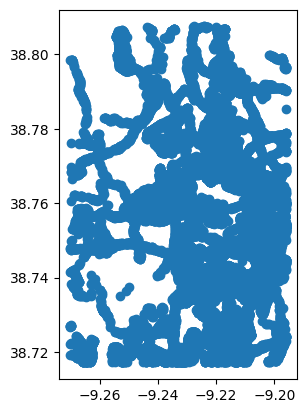

In [6]:
mappilaryPts.plot()

In [12]:
buffersETRS = buffers.to_crs(3447)

In [14]:
mappilaryPtsERTS = mappilaryPts.to_crs(3447)

In [16]:
# spatial join with count by point

# polys = gpd.read_file(r"C:\Test\Shapes.shp")
# points = gpd.read_file(r"C:\Test\POI.shp")

dfsjoin = gpd.sjoin(buffersETRS, mappilaryPtsERTS) #Spatial join Points to polygons
dfpivot = pd.pivot_table(dfsjoin,index='Localizacao_erros__Smaile_Inq',columns='value',aggfunc={'value':len})
dfpivot.columns = dfpivot.columns.droplevel()

dfpolynew = buffersETRS.merge(dfpivot, how='left', on='Localizacao_erros__Smaile_Inq')


In [17]:
dfpolynew.head()

,FacilityID,Name,FromBreak,ToBreak,OBJECTID_1,Localizacao_erros__OBJECTID,Localizacao_erros__Smaile_Inq,Localizacao_erros__Smaile_I_1,Localizacao_erros__Smaile_I_2,Localizacao_erros__Smaile_I_3,...,object--traffic-light--pedestrians-side,object--traffic-sign--back,object--traffic-sign--direction-back,object--traffic-sign--direction-front,object--traffic-sign--front,object--traffic-sign--information-parking,object--traffic-sign--temporary-back,object--traffic-sign--temporary-front,object--trash-can,object--water-valve
0,705,920 : 0 - 500,0.0,500.0,705,719.0,920.0,Rua Beatriz Costa,1.0,2.0,...,NaN,45.0,5.0,35.0,81.0,3.0,NaN,1.0,19.0,NaN
1,704,1161 : 0 - 500,0.0,500.0,704,708.0,1161.0,Rua das Milflores,1.0,2.0,...,NaN,55.0,11.0,61.0,121.0,3.0,NaN,1.0,20.0,NaN
2,702,452 : 0 - 500,0.0,500.0,702,467.0,452.0,Avenida dos Moinhos,1.0,2.0,...,NaN,49.0,11.0,64.0,118.0,2.0,NaN,1.0,24.0,NaN
3,724,533 : 0 - 500,0.0,500.0,724,1501.0,533.0,Praceta Ireneu Dias,1.0,11.0,...,NaN,15.0,NaN,5.0,30.0,NaN,NaN,NaN,NaN,NaN
4,755,1137 : 0 - 500,0.0,500.0,755,1543.0,1137.0,Rua Eus├®bio da Silva Ferreira,1.0,11.0,...,NaN,12.0,NaN,3.0,24.0,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

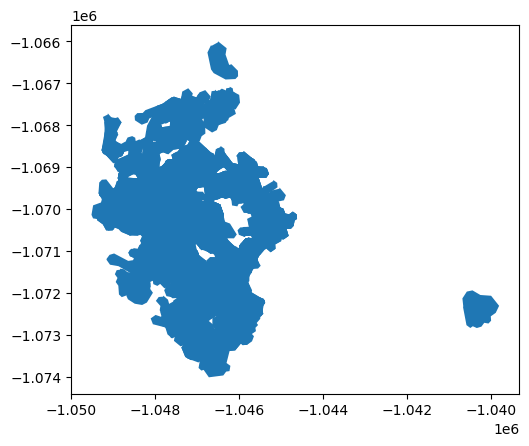

In [18]:
dfpolynew.plot()

In [19]:
#save count spatial join

dfpolynew.to_file("CountMappilaryByffers.geojson", driver='GeoJSON')